In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from mpl_finance import candlestick_ohlc
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator


%matplotlib inline


In [2]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2019,1,30)
stocks = 'FB NFLX AMZN GOOG AAPL NVDA SQ ^IXIC'
stocks = stocks.split()
data = web.DataReader(stocks, 'yahoo', start, end )

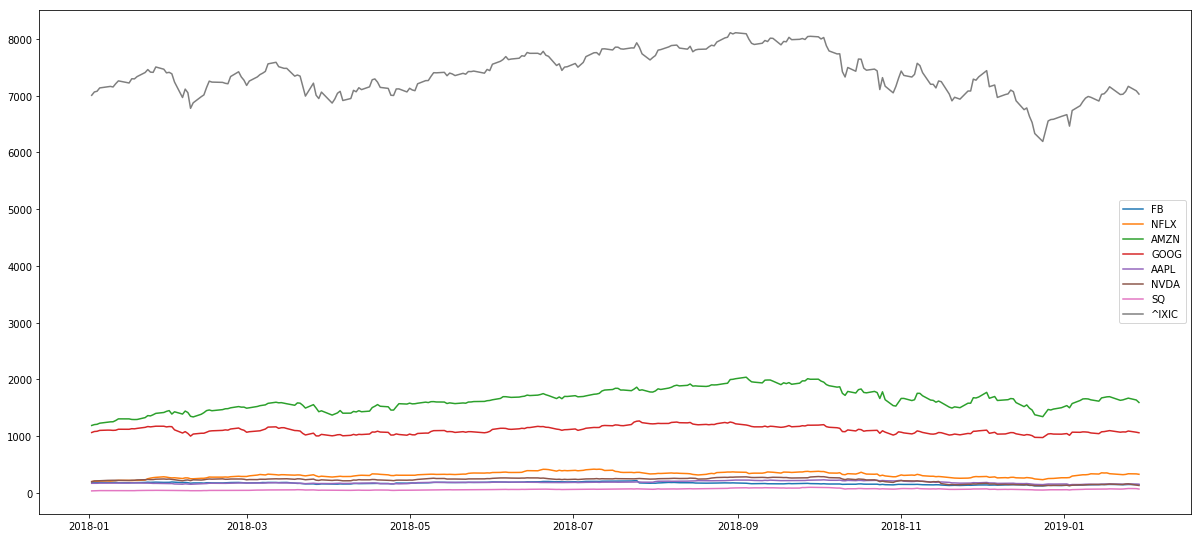

In [3]:
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(data['Adj Close', stock], label =stock)

ax.legend(loc = 0 )

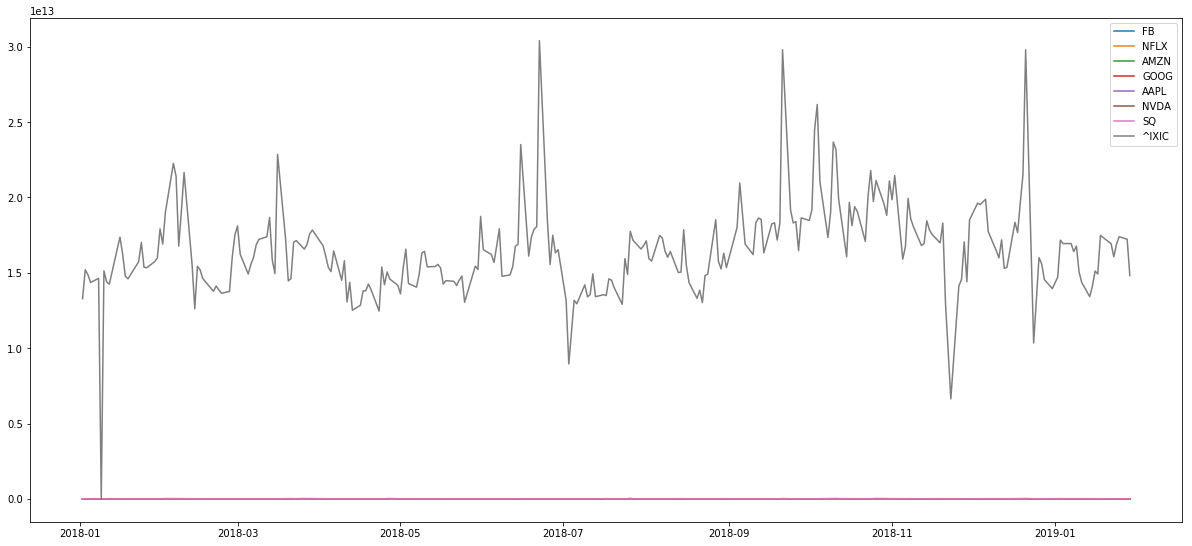

In [4]:
## transactions volume

volumesDF = pd.DataFrame()
fig = plt.figure(figsize=(16,7))
ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    volumesDF[stock] = data['Open',stock] * data['Volume', stock]

for stock in stocks:
    ax.plot(volumesDF[stock], label =stock)

ax.legend(loc = 0 )

## Daily Returns & Volatility


In [5]:
dailyReturnsDF = pd.DataFrame()


for stock in stocks:
    dailyReturnsDF[stock] = data['Adj Close',stock].pct_change(1) 


# dailyReturnsDF['ERAA'] = data['Close','ERAA.JK'].pct_change(1) 




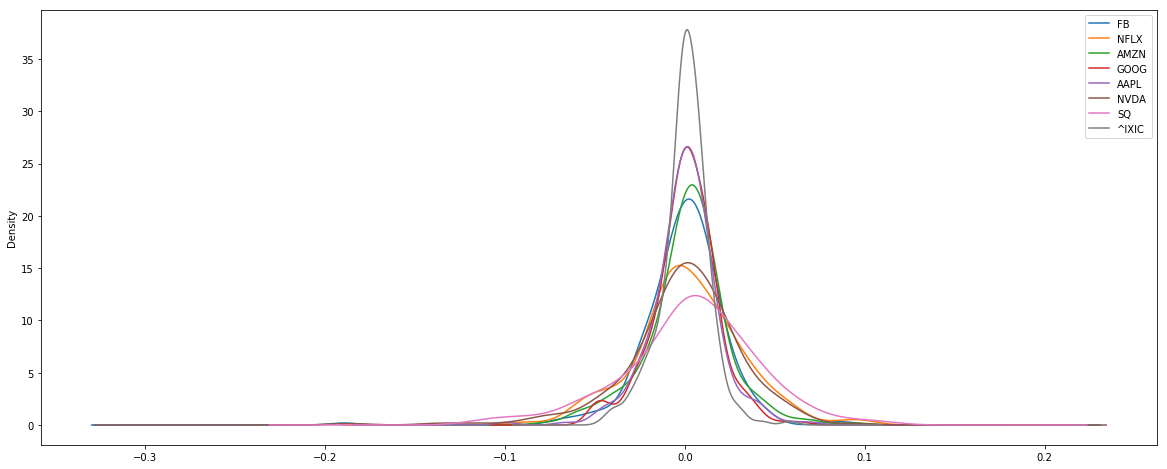

In [6]:
for stock in stocks:
    dailyReturnsDF[stock].plot(kind='kde' , figsize = (20,8), label =stock)

# dailyReturnsDF['ERAA'].plot(kind='kde' , figsize = (20,8), label ='ERAA')


plt.legend()

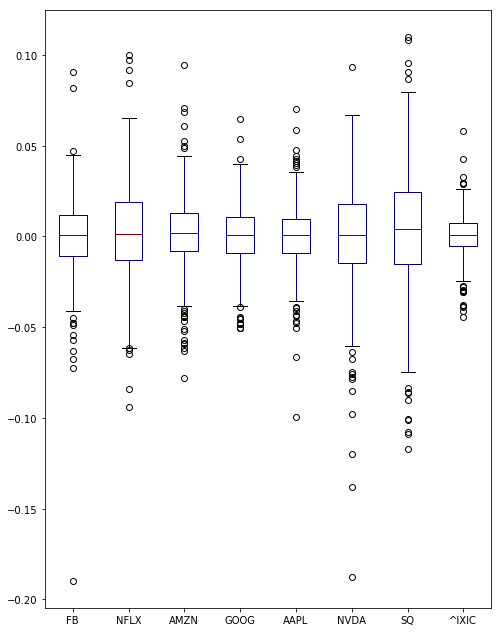

In [7]:
##BOX CHARTS
dailyReturnsDF.plot(kind='box',figsize=(8,11),colormap='jet')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f59285d04a8>,
      dtype=object)

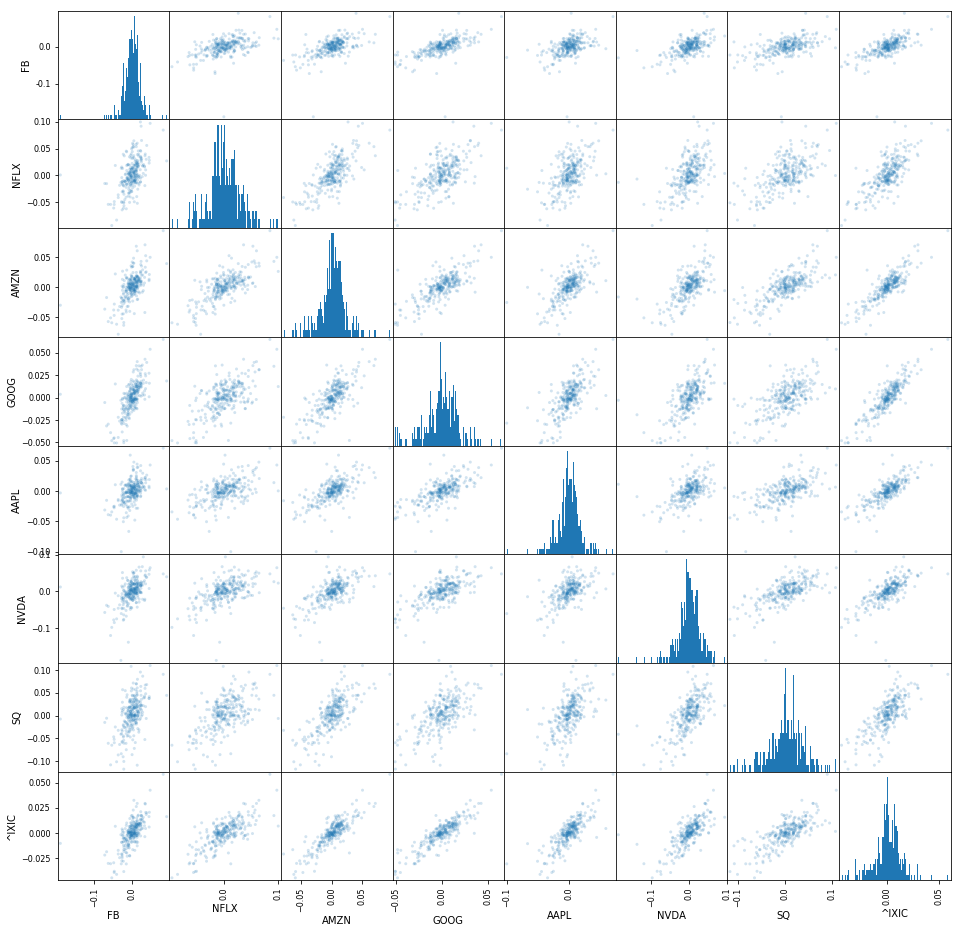

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(dailyReturnsDF, figsize=(16,16), alpha = 0.2, hist_kwds={'bins':100})

## Cummulative returns

In [9]:
Cummulative = pd.DataFrame()

for stock in stocks:
    Cummulative[stock] = (1+dailyReturnsDF[stock]).cumprod() 



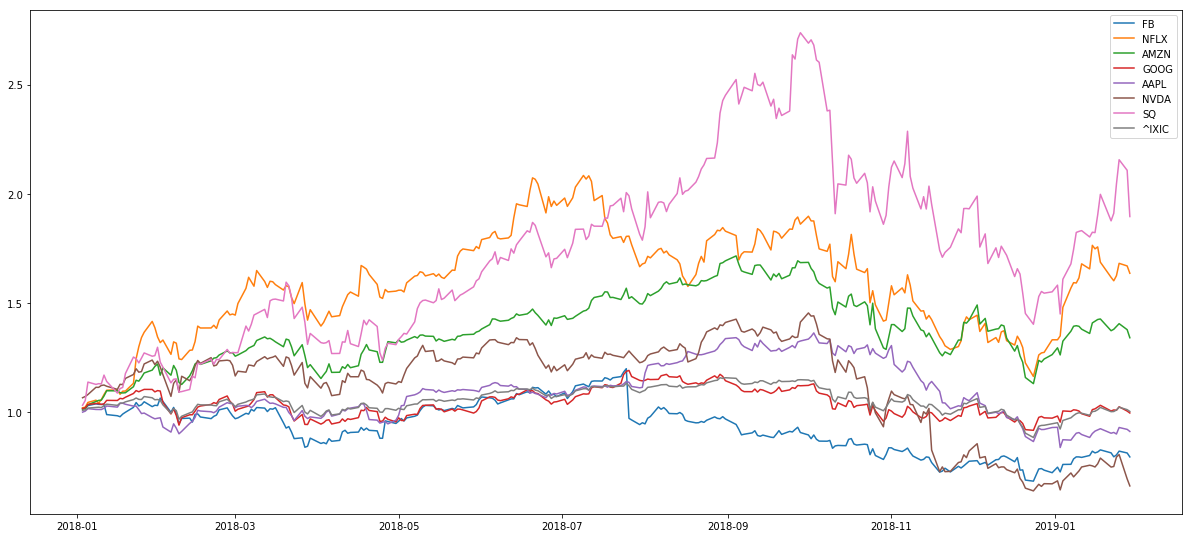

In [10]:
fig = plt.figure(figsize=(16,7))

ax = fig.add_axes([0,0,1,1])

for stock in stocks:
    ax.plot(Cummulative[stock], label =stock)


ax.legend(loc = 0 )

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# ETS (Error Trend Seasonal ) analysis 



In [17]:
result = seasonal_decompose(dailyReturnsDF['NFLX'][1:], model ='additive', freq=7)


<Figure size 1152x504 with 0 Axes>

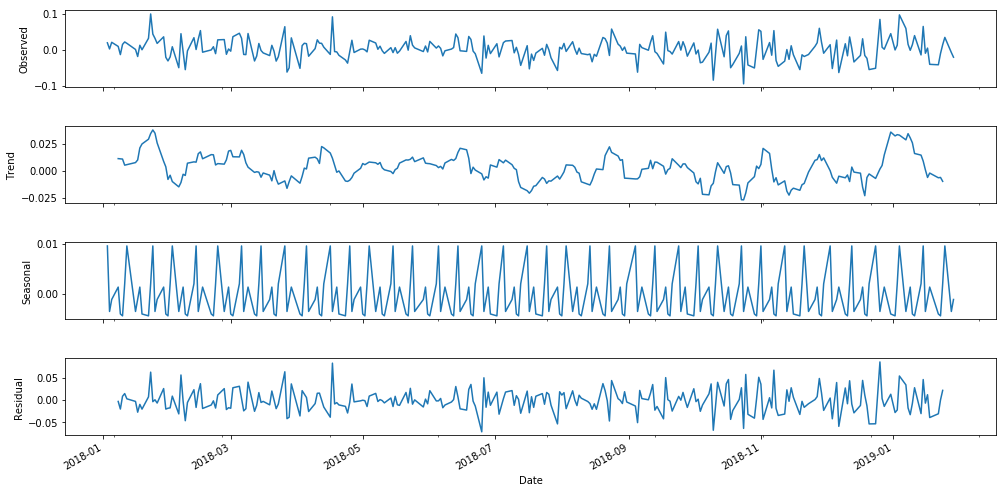

In [18]:
fig = plt.figure(figsize=(16,7))

fig = result.plot()
fig.set_size_inches(16,8)

<Figure size 432x288 with 0 Axes>

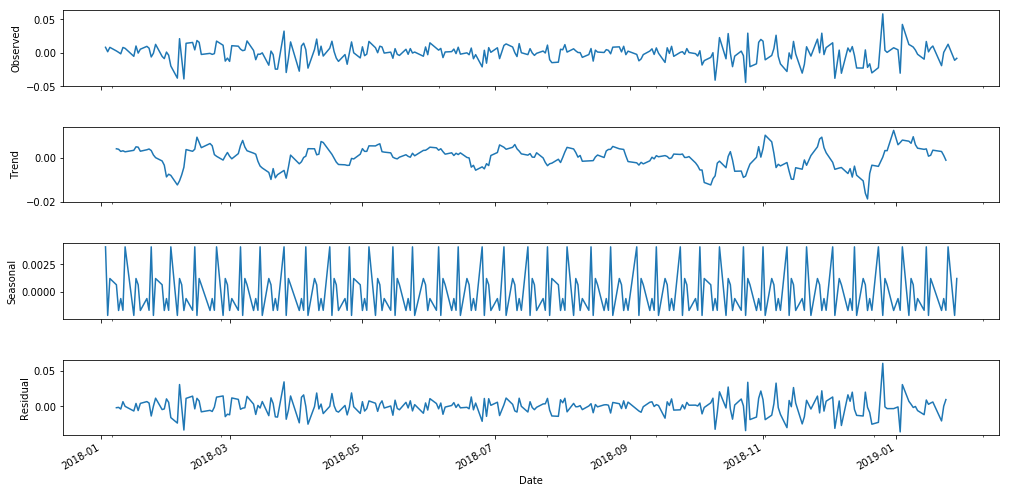

In [14]:
#nasdaq
result = seasonal_decompose(dailyReturnsDF['^IXIC'][1:], model ='additive', freq=7)
fig = plt.figure()


fig = result.plot()

fig.set_size_inches(16,8)

In [23]:
result.seasonal.describe()

count    269.000000
mean       0.000018
std        0.004598
min       -0.004371
25%       -0.004001
50%       -0.001107
75%        0.002028
max        0.009579
Name: NFLX, dtype: float64

In [24]:
result.seasonal.tail(1)

Date
2019-01-29   -0.001107
Name: NFLX, dtype: float64

In [15]:
dailyReturnsDF['NVDA'].describe()

count    269.000000
mean      -0.000992
std        0.032392
min       -0.187559
25%       -0.014657
50%        0.000873
75%        0.018057
max        0.093632
Name: NVDA, dtype: float64

In [16]:
data['Adj Close'].tail()

Symbols,AAPL,AMZN,FB,GOOG,NFLX,NVDA,SQ,^IXIC
Date,,,,,,,,
2019-01-23,153.919998,1640.020020,144.300003,1075.569946,321.989990,149.289993,69.099998,7025.770020
2019-01-24,152.699997,1654.930054,145.830002,1073.900024,326.670013,157.839996,73.940002,7073.459961
2019-01-25,157.759995,1670.569946,149.009995,1090.989990,338.049988,160.149994,77.970001,7164.859863
2019-01-28,156.300003,1637.890015,147.470001,1070.079956,335.660004,138.009995,76.220001,7085.680176
2019-01-29,154.679993,1593.880005,144.190002,1060.619995,328.899994,131.600006,68.559998,7028.290039
